In [56]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

cancer_path=Path('Resources/cancer_dataset.csv')

cancer_df=pd.read_csv(cancer_path,encoding="ISO-8859-1")


cancer_df=cancer_df.astype({"Percent_of_Population_Married":int,"Average_Deaths_per_Year":int,"Population_Estimate_2015":int})
cancer_df.head()

,County,State,Cancer_Incidence_Count,Average_Deaths_per_Year,Median_Income,Population_Estimate_2015,Poverty_Rate,Percent_of_Population_Married,Percent_Employed_Over_16,Percent_Unemployed_Over_16,Median_Age,Median_Age_Male,Median_Age_Female,Public_Insurance_%,Private_Insurance_%,Pop_Percent_White,Pop_Percent_Black,Pop_Percent_Asian,Pop_Percent_Other_Race
0,Kitsap County,Washington,1397.0,469,61898,260131,11.2,52,51.9,8.0,39.3,36.9,41.7,32.9,75.1,81.780529,2.594728,4.821857,1.843479
1,Kittitas County,Washington,173.0,70,48127,43269,18.6,44,55.9,7.8,33.0,32.2,33.7,31.1,70.2,89.228509,0.969102,2.246233,3.741352
2,Klickitat County,Washington,102.0,50,49348,21026,14.6,54,45.9,7.0,45.0,44.0,45.8,42.1,63.7,90.922190,0.739673,0.465898,2.747358
3,Lewis County,Washington,427.0,202,44243,75882,17.1,52,48.3,12.1,42.8,42.2,43.4,45.3,58.4,91.744686,0.782626,1.161359,1.362643
4,Lincoln County,Washington,57.0,26,49955,10321,12.5,57,48.2,4.8,48.3,47.8,48.9,44.0,61.6,94.104024,0.270192,0.665830,0.492135


In [57]:

cancer_df["Percent_Cancer_Deaths"]=(cancer_df["Average_Deaths_per_Year"]/cancer_df["Cancer_Incidence_Count"])*100
cancer_df.head(10)

,County,State,Cancer_Incidence_Count,Average_Deaths_per_Year,Median_Income,Population_Estimate_2015,Poverty_Rate,Percent_of_Population_Married,Percent_Employed_Over_16,Percent_Unemployed_Over_16,Median_Age,Median_Age_Male,Median_Age_Female,Public_Insurance_%,Private_Insurance_%,Pop_Percent_White,Pop_Percent_Black,Pop_Percent_Asian,Pop_Percent_Other_Race,Percent_Cancer_Deaths
0,Kitsap County,Washington,1397.0,469,61898,260131,11.2,52,51.9,8.0,39.3,36.9,41.7,32.9,75.1,81.780529,2.594728,4.821857,1.843479,33.571940
1,Kittitas County,Washington,173.0,70,48127,43269,18.6,44,55.9,7.8,33.0,32.2,33.7,31.1,70.2,89.228509,0.969102,2.246233,3.741352,40.462428
2,Klickitat County,Washington,102.0,50,49348,21026,14.6,54,45.9,7.0,45.0,44.0,45.8,42.1,63.7,90.922190,0.739673,0.465898,2.747358,49.019608
3,Lewis County,Washington,427.0,202,44243,75882,17.1,52,48.3,12.1,42.8,42.2,43.4,45.3,58.4,91.744686,0.782626,1.161359,1.362643,47.306792
4,Lincoln County,Washington,57.0,26,49955,10321,12.5,57,48.2,4.8,48.3,47.8,48.9,44.0,61.6,94.104024,0.270192,0.665830,0.492135,45.614035
5,Mason County,Washington,428.0,152,52313,61023,15.6,50,44.1,12.9,45.4,43.5,48.0,43.2,60.0,84.882631,1.653205,1.538057,3.314635,35.514019
6,Okanogan County,Washington,250.0,97,37782,41516,23.2,54,51.8,8.9,42.6,42.2,43.5,46.4,49.5,75.106455,0.616955,0.866157,8.356721,38.800000
7,Pacific County,Washington,146.0,71,40189,20848,17.8,52,40.9,8.9,51.7,50.8,52.5,50.9,55.8,89.406636,0.305159,1.889077,2.286268,48.630137
8,Pend Oreille County,Washington,88.0,36,42579,13088,22.3,55,39.5,10.3,49.3,48.4,49.8,48.1,55.5,91.787477,0.185071,0.208205,0.616903,40.909091
9,Pierce County,Washington,4025.0,1380,60397,843954,13.1,50,56.6,9.2,35.8,34.7,37.0,31.4,69.9,74.729668,6.710854,6.041472,2.699184,34.285714


In [58]:
marriage_bins=[20,25,30,35,40,45,50,55,60,65,70,75]
labels=["20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%","60-65%","65-70%","70-75%"]
marriage_df=cancer_df.copy()


In [59]:
marriage_df["Percent_of_Population_Married"]=pd.cut(marriage_df["Percent_Cancer_Deaths"],marriage_bins,labels=labels)
death_rates_by_marriage=marriage_df.groupby(["Percent_of_Population_Married"])["Percent_Cancer_Deaths"].mean()
age_marriage=marriage_df.groupby(["Percent_of_Population_Married"])["Median_Age"].mean()
marriage_groups=marriage_df.groupby(["Percent_of_Population_Married"])
marriage_count=marriage_groups["Percent_of_Population_Married"].count()


In [60]:
death_and_marriage=pd.DataFrame({"Number of Households":marriage_count,
                                 "Average Cancer Death Rate":death_rates_by_marriage,
                                 "Average Age of Population":age_marriage})
death_and_marriage

,Number of Households,Average Cancer Death Rate,Average Age of Population
Percent_of_Population_Married,,,
20-25%,10,24.027662,39.560000
25-30%,54,28.783131,44.831481
30-35%,291,33.167707,46.367354
35-40%,887,37.730053,46.728523
40-45%,932,42.363579,43.628112
45-50%,472,47.334575,44.822246
50-55%,121,52.203793,42.419835
55-60%,50,57.140633,63.112000
60-65%,18,62.076551,41.205556


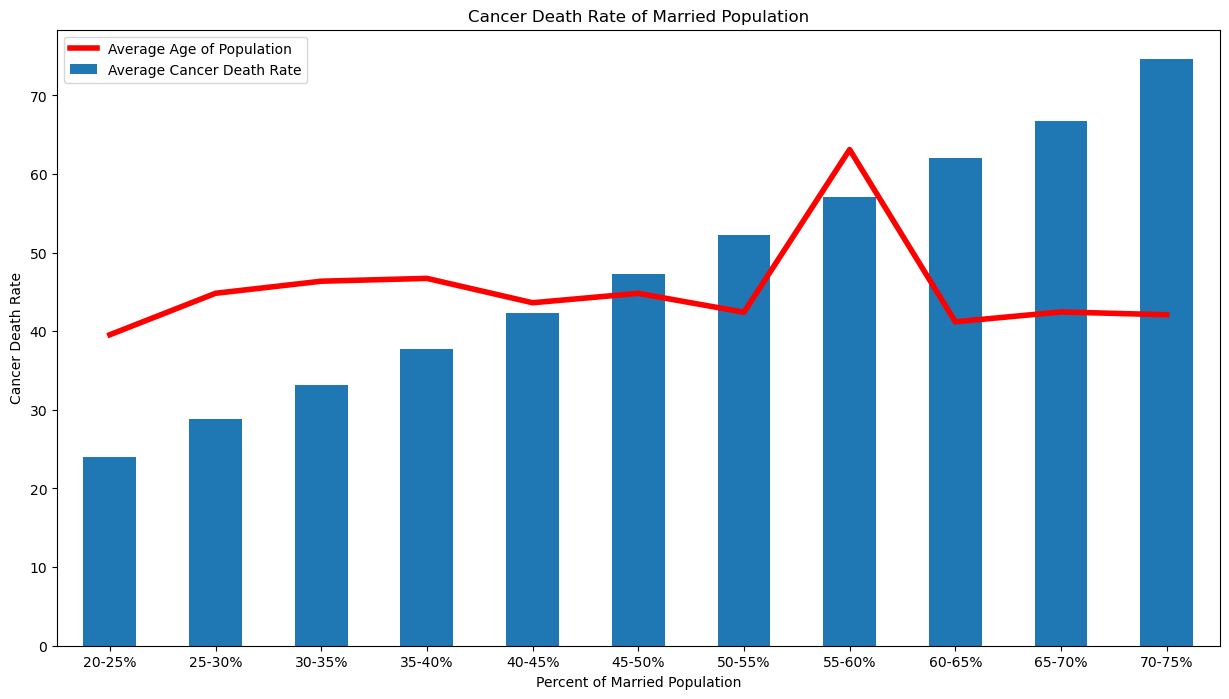

In [74]:
#tick_locations=[value for value in labels]
#x_axis=np.arange(len(death_and_marriage))
#plt.bar(x_axis,death_and_marriage["Average Cancer Death Rate"],color='r',alpha=0.5,align='center')
#plt.xticks(tick_locations,death_and_marriage["Average Cancer Death Rate"],rotation='vertical')   
death_and_marriage["Average Cancer Death Rate"].plot(kind="bar",figsize=(15,8)) 
death_and_marriage["Average Age of Population"].plot(kind="line",color="r",linewidth=4)
plt.title("Cancer Death Rate of Married Population") 
plt.xlabel("Percent of Married Population")
plt.ylabel("Cancer Death Rate")
plt.legend()